<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/Machine_laerning/SVM(Support_Vector_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [126]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [44]:
from sklearn.svm import SVR, SVC #회귀와 분류
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [45]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.2177283706374875
평가 데이터 점수 : 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [46]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [47]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 학습 데이터 점수 : {}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수 : {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train,y_train)

print("Polynomial SVR 학습 데이터 점수 : {}".format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수 : {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 학습 데이터 점수 : {}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수 : {}".format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수 : 0.715506620496448
Linear SVR 평가 데이터 점수 : 0.6380398541506058
Polynomial SVR 학습 데이터 점수 : 0.2024454261446289
Polynomial SVR 평가 데이터 점수 : 0.133668450367462
RBF SVR 학습 데이터 점수 : 0.2177283706374875
RBF SVR 평가 데이터 점수 : 0.13544178468518187


In [48]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

print("Linear SVC 학습 데이터 점수 : {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수 : {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train,y_train)

print("Polynomial SVC 학습 데이터 점수 : {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

print("RBF SVC 학습 데이터 점수 : {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수 : 0.960093896713615
Linear SVC 평가 데이터 점수 : 0.986013986013986
Polynomial SVC 학습 데이터 점수 : 0.9014084507042254
Polynomial SVC 평가 데이터 점수 : 0.9230769230769231
RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC 평가 데이터 점수 : 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [49]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [50]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1 , gamma='auto')
polynomial_svc.fit(X_train,y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수 : {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}".format(polynomial_svc.score(X_test, y_test)))

kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수 : 0.9835680751173709
Polynomial SVC 평가 데이터 점수 : 0.993006993006993


In [51]:
rbf_svc = SVC(kernel='rbf',C=2.0, gamma='scale')
rbf_svc.fit(X_train,y_train)

print("kernel= RBF, C={}, gamma={}".format(2.0 , 'scale'))
print("RBF SVC 학습 데이터 점수 : {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

kernel= RBF, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수 : 0.9154929577464789
RBF SVC 평가 데이터 점수 : 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [52]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [53]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9014084507042254
SVC 평가 데이터 점수 : 0.9230769230769231


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9835680751173709
SVC 평가 데이터 점수 : 0.986013986013986


In [56]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9906103286384976
SVC 평가 데이터 점수 : 0.986013986013986


In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9812206572769953
SVC 평가 데이터 점수 : 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [59]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print("SVR 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("SVR 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

SVR 학습 데이터 점수 : 0.6845613014782957
SVR 평가 데이터 점수 : 0.8167479691603318


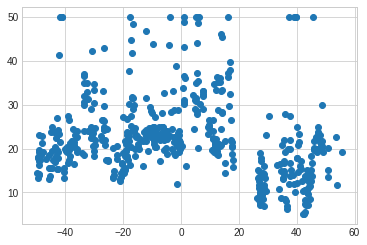

In [62]:
#저차원 형태로 변환
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

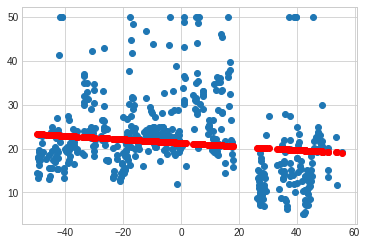

In [63]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [64]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.02486968, 0.02500367, 0.02343297, 0.02381063, 0.02110314]),
 'score_time': array([0.00207233, 0.00192285, 0.0018003 , 0.00178266, 0.00132036]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [73]:
 pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [74]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

## Linear SVC

### 유방암

In [133]:
import mglearn

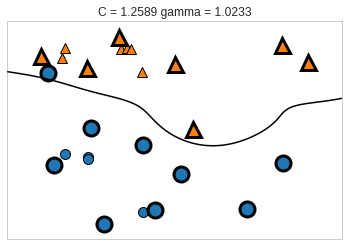

In [146]:
mglearn.plots.plot_svm(log_C = 0.1, log_gamma=0.01)

In [104]:
X, y =load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.989010989010989
평가 데이터 점수 : 0.9649122807017544


In [107]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [108]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contour(xx, yy, Z, **params)

  return out

In [109]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

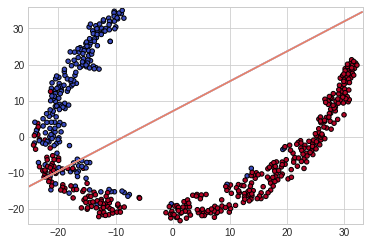

In [110]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [111]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01583743, 0.00585294, 0.008569  , 0.0058012 , 0.00480175]),
 'score_time': array([0.00089955, 0.00100017, 0.00090265, 0.00093913, 0.00072956]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [112]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv =5,
    verbose= True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             pre_dispatch='2*n_jobs'

In [113]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

In [114]:
X, y =load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9916666666666667
평가 데이터 점수 : 0.9


In [121]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

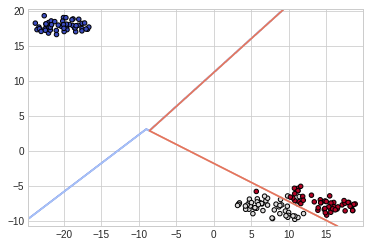

In [127]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [128]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00148606, 0.00207734, 0.00480413, 0.00135374, 0.00186801]),
 'score_time': array([0.00046468, 0.00056958, 0.00061798, 0.00044441, 0.00040483]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [129]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv =5,
    verbose= True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             pre_dispatch='2*n_jobs'

In [130]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)